In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the cryptocurrency symbol (e.g., Bitcoin)
crypto_symbol = "BTC-USD"

In [3]:
# Define the start and end dates for historical data
start_date = "2020-01-01"
end_date = "2021-12-31"

In [4]:
# Download historical cryptocurrency data using yfinance
crypto_data = yf.download(crypto_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
# Define the short-term and long-term moving average windows
short_window = 50
long_window = 200

In [6]:
# Calculate the short-term and long-term moving averages
crypto_data['SMA50'] = crypto_data['Close'].rolling(window=short_window).mean()
crypto_data['SMA200'] = crypto_data['Close'].rolling(window=long_window).mean()

In [7]:
# Create a function to generate buy/sell signals based on moving average crossovers
def generate_signals(data):
    signals = []
    position = None

    for i in range(len(data)):
        if data['SMA50'][i] > data['SMA200'][i]:
            if position != 'long':
                signals.append(1)  # Buy signal
                position = 'long'
            else:
                signals.append(0)  # Hold signal
        elif data['SMA50'][i] < data['SMA200'][i]:
            if position != 'short':
                signals.append(-1)  # Sell signal
                position = 'short'
            else:
                signals.append(0)  # Hold signal
        else:
            signals.append(0)  # Hold signal

    return signals

In [8]:
# Generate buy/sell signals
crypto_data['Signal'] = generate_signals(crypto_data)

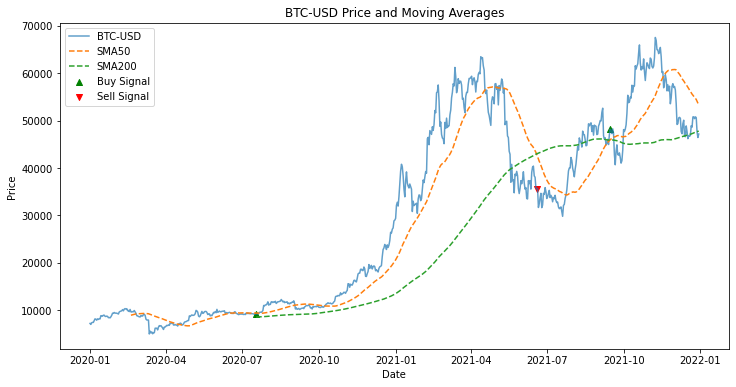

In [9]:
# Plotting the cryptocurrency prices and buy/sell signals
plt.figure(figsize=(12, 6))
plt.plot(crypto_data['Close'], label=crypto_symbol, alpha=0.7)
plt.plot(crypto_data['SMA50'], label='SMA50', linestyle='--')
plt.plot(crypto_data['SMA200'], label='SMA200', linestyle='--')
plt.title(f'{crypto_symbol} Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot buy/sell signals
buy_signals = crypto_data[crypto_data['Signal'] == 1]
sell_signals = crypto_data[crypto_data['Signal'] == -1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', alpha=1)
plt.legend()

# Show the plot
plt.show()